### The Impact of Large Sample Sizes

When we increase our sample size, even the smallest of differences may seem significant.  

To illustrate this point, work through this notebook and the quiz questions that follow below.

Start by reading in the libraries and data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')

`1.` In this case, imagine we are interested in testing if the mean height of all individuals in `full_data` is equal to 67.60 inches or **different** than 67.60.  First, use **quiz 1** below to state the null and alternative hypotheses for these cases in the cell below. 

  $H_0: \mu_h = 67.6\text{ in}$  
  $H_1: \mu_h \ne 67.6\text{ in}$ 

`2.` Find:
* What is the population mean height?  
* What is the standard deviation of the population heights?  Create a sample set of data using the code below.  
* What is the sample mean height?  Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. 
* What is the standard deviation of the sampling distribution of the mean of five draws? 
Use **quiz 2** below to assure your answers are correct.  

In [2]:
full_data.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [3]:
pop_mean_height = full_data.height.mean()
pop_mean_height

67.597486973079342

In [4]:
pop_std_height = full_data.height.std()
pop_std_height

3.1194332065503421

In [5]:
sample1 = full_data.sample(5)

In [6]:
sample_mean_height = sample1.height.mean()
sample_mean_height

67.882342520490838

In [7]:
sample_std_height = sample1.height.std()
sample_std_height

2.8434965552901939

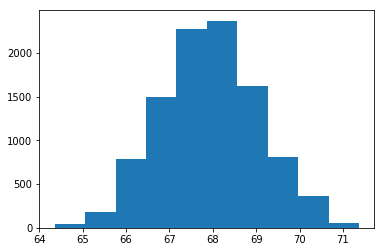

In [8]:
sample_dist = []
for i in range(10000):
    sample_draw = sample1.sample(5, replace=True)
    sample_dist.append(sample_draw.height.mean())
plt.hist(sample_dist);

In [9]:
std_sampling_dist = np.std(sample_dist)
std_sampling_dist

1.141357351999374

`3.` Using the null and alternative hypotheses set up in question 1 and the results of your sampling distribution in question 2, simulate the mean values you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.  Check your solution using **quiz 3** and **quiz 4** below.

**Hint:** Use the numpy documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to assist with your solution.

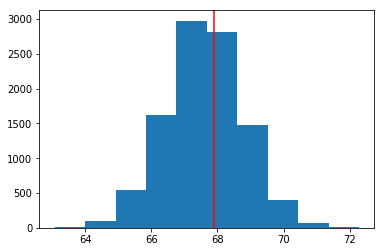

In [10]:
null_mean = 67.6
null_val = np.random.normal(null_mean, std_sampling_dist, 10000)
plt.hist(null_val);
plt.axvline(x=sample1.height.mean(), color = 'red');

In [11]:
# for a two sided hypothesis, we want to look at anything
# more extreme from the null in both directions
obs_mean = sample1.height.mean()

#probability of a statistic higher than observed
prob_more_extreme_high = (null_val > obs_mean).mean()

#probability of a statistic lower than observed
prob_more_extreme_low = (null_mean - (obs_mean - null_mean) > null_val).mean()
prob_more_extreme_low

pval = prob_more_extreme_low + prob_more_extreme_high
pval

0.80499999999999994

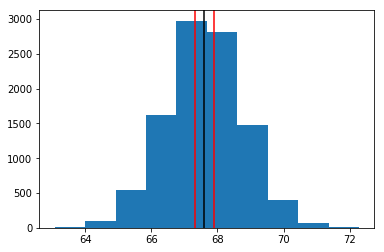

In [12]:
upper_bound = obs_mean
lower_bound = null_mean - (obs_mean - null_mean)

plt.hist(null_val);
plt.axvline(x=lower_bound, color ='red'); #where our sample mean falls on null dist
plt.axvline(x=null_mean, color = 'black'); #the null mean
plt.axvline(x=upper_bound, color ='red'); #where our sample mean falls on null dist

In [13]:
print(upper_bound, lower_bound)

67.8823425205 67.3176574795


`4.` Now imagine if you received the same sample mean as you calculated from the sample in question 1 above, but that you actually retrieved it from a sample of 300.  What would the new standard deviation be for your sampling distribution for the mean of 300 values?  Additionally, what would your new p-value be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  Use your solutions here to answer the second to last quiz question below.

**Hint:**  If you get stuck, notice you can use the solution from quiz regarding finding the p-value earlier to assist with obtaining this answer with just a few small changes.

In [14]:
sample_2 = full_data.sample(300)
obs_mean = sample_2.height.mean()

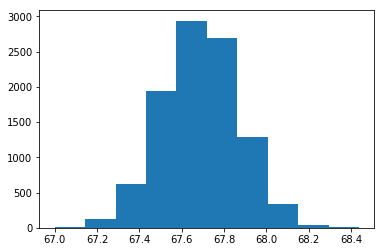

In [15]:
sample_dist_300 = []
for i in range(10000):
    sample_draw = sample_2.sample(300, replace=True)
    sample_dist_300.append(sample_draw.height.mean())

plt.hist(sample_dist_300);

In [16]:
sample_300_std = np.std(sample_dist_300)
sample_300_std

0.18108485974118899

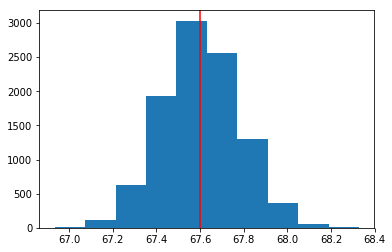

In [17]:
null_vals = np.random.normal(null_mean, sample_300_std, 10000)
plt.hist(null_vals);
plt.axvline(x=null_mean, color='red');

In [18]:
# for a two sided hypothesis, we want to look at anything
# more extreme from the null in both directions
obs_mean2 = sample_2.height.mean()

#probability of a statistic higher than observed
prob_more_extreme_high_2 = (null_vals > obs_mean2).mean()

#probability of a statistic lower than observed
prob_more_extreme_low_2 = (null_mean - (obs_mean2 - null_mean) > null_vals).mean()
prob_more_extreme_low_2

pval_2 = prob_more_extreme_low_2 + prob_more_extreme_high_2
pval_2

0.61370000000000002

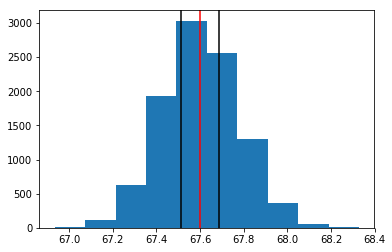

In [19]:
lower_bound = (null_mean-(obs_mean2-null_mean))
upper_bound = obs_mean2

plt.hist(null_vals);
plt.axvline(x=null_mean, color='red'); #null_mean
plt.axvline(x=lower_bound, color='black'); #lower_bound
plt.axvline(x=upper_bound, color='black'); #upper_bound

`5.` Reflect on what happened by answering the final quiz in this concept.

the standard deviation shrunk, the pvalue shrunk.  increasing the sample size creates less variation in the sampling distribution

In [20]:
obs_mean2

67.688767951038926